In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft

In [2]:
sampling = 0.05

plt.rcParams['figure.figsize'] = [15, 14]
plt.rcParams['figure.dpi'] = 80

x = np.arange(-6, 6, sampling)

In [3]:
def FFT(data):
    return fft.fft(data, len(data))
def iFFT(data):
    return fft.ifft(data)

#get axis to plot FT on
def getFreqAxis(x):
    samplingFreq = 1/sampling
    return np.arange(-samplingFreq/2, samplingFreq/2, samplingFreq/len(x))
def flipAtOrigin(data):
    tmp = np.split(data, 2)
    return np.concatenate([tmp[1], tmp[0]])

In [4]:
#apply givven filter to given FT
#data - array float, size [N]
#filt - array float, size [N]
def applyFilter(data, filt):
    tmp = np.split(data, 2)
    fs = np.concatenate([tmp[1], tmp[0]])
    fs = fs*filt
    tmp = np.split(fs, 2)
    return np.concatenate([tmp[1], tmp[0]])

In [5]:
def rect(w, x):
    return 1 if np.abs(x)<=w else 0

In [6]:
def sin3(x):
    return np.sin(x)+np.sin(6*x)*0.2+np.sin(20*x)*0.2

In [7]:
def medianFilter(data, radius = 5):
    out = np.zeros(len(data))
    for i in range(len(data)):
        count = 0
        sum_val = 0
        for j in range(-radius, radius):
            count+=1
            sum_val += data[i+j] if 0 <= i+j < len(data)  else 0
        out[i] = sum_val/count
    return out

In [8]:
def test(f, filt):
    fig, axs = plt.subplots(5)
    data = FFT(np.vectorize(f)(x))
    filt_freq = np.vectorize(filt)(getFreqAxis(x))
    
    #filter using perf filter in freq space
    filtered = np.vectorize(filt)(x) * flipAtOrigin(data)

    axs[0].plot(getFreqAxis(x), np.abs(flipAtOrigin(data)))
    axs[0].plot(getFreqAxis(x), np.abs(filtered),  color = 'red')
    axs[0].plot(x, filt_freq*np.amax(np.abs(data)))
    axs[0].grid()
    
    filtered = flipAtOrigin(filtered)
    data = iFFT(filtered)
    
    axs[1].plot(x, np.vectorize(f)(x))
    axs[1].plot(x, np.real(data), color = 'red')
    axs[1].grid()
    
    #filt_freq = np.concatenate([filt_freq[:int(len(filt_freq)/2)], np.flip(filt_freq[:int(len(filt_freq)/2)])])
    filt_freq = flipAtOrigin(filt_freq)
    impulseResponse = iFFT(filt_freq)
    impulseResponse =  flipAtOrigin(impulseResponse)
    axs[2].plot(x, np.real(impulseResponse))
    axs[2].grid()
    
    convD = np.convolve(impulseResponse, data, 'same')
    axs[3].plot(x, np.real(convD))
    axs[3].plot(x, medianFilter(np.vectorize(f)(x), 10))
    axs[3].grid()
    
    confFData = flipAtOrigin(FFT(convD))
    axs[4].plot(getFreqAxis(x), np.abs(confFData))
    axs[4].grid()

In [9]:
from functools import partial

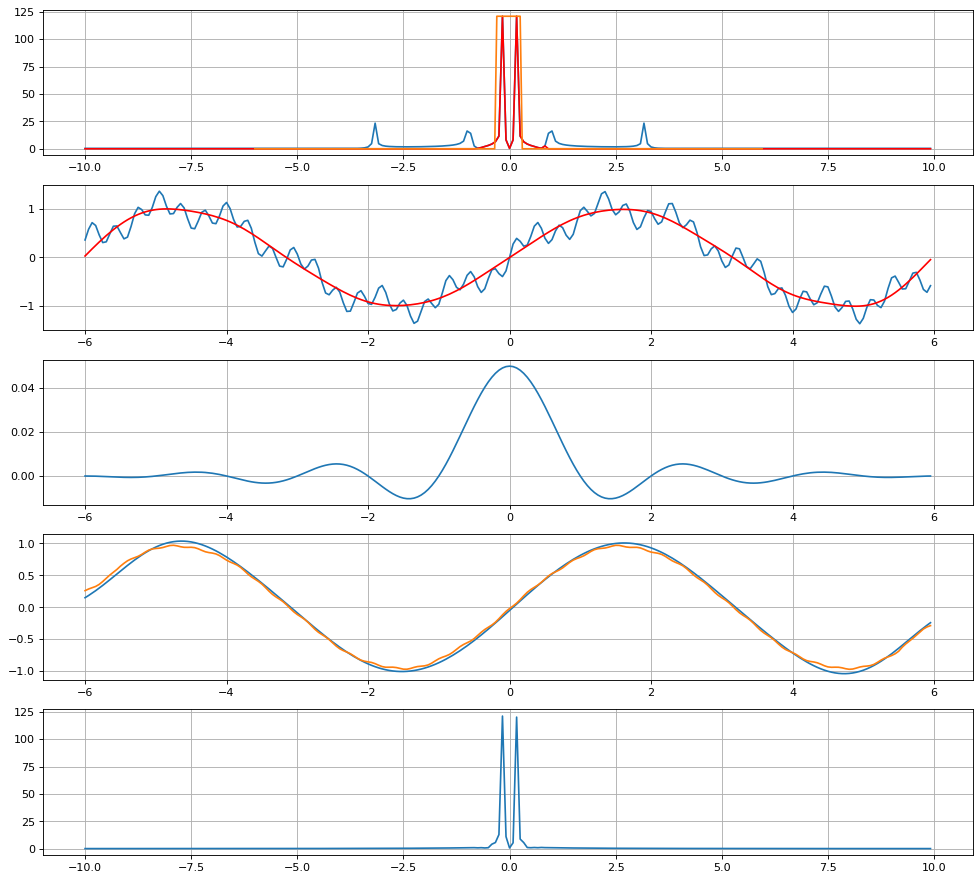

In [10]:
test(sin3, partial(rect, 0.5))

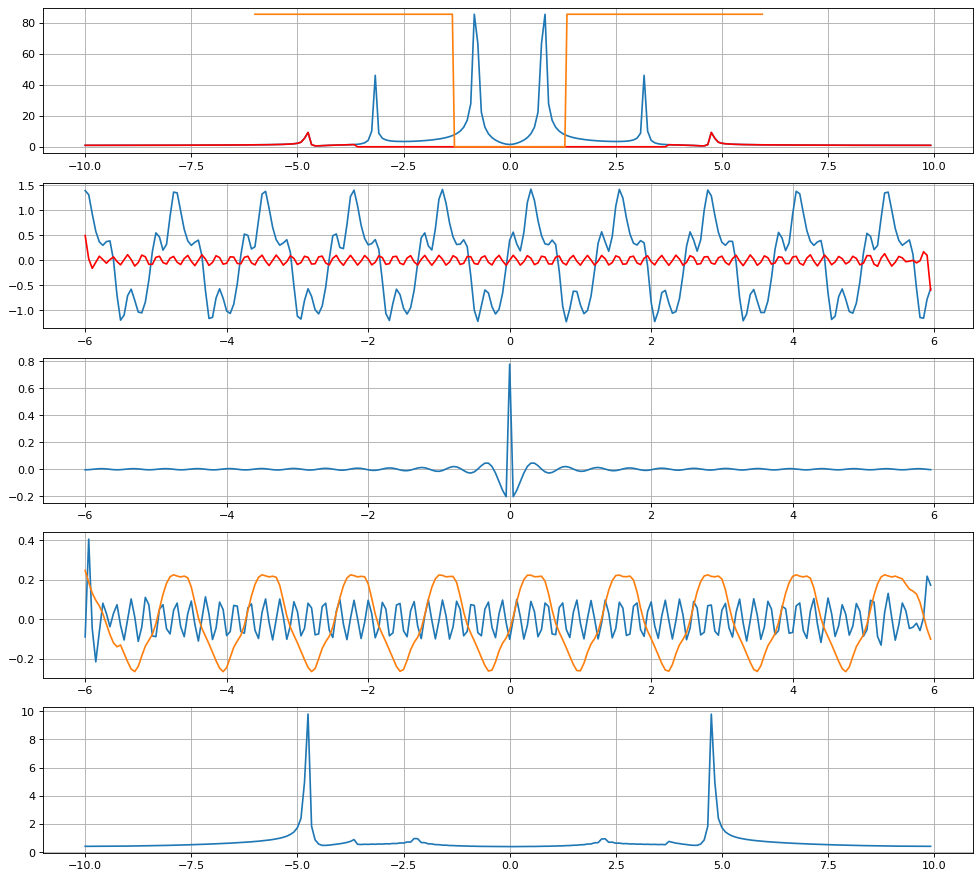

In [11]:
def hpf_filt(freq, x):
    return 1 if np.abs(x)>freq else 0
def sin4(x):
    return np.sin(5*x) + 0.4*np.cos(20 * x) + 0.1*np.sin(30 * x)
test(sin4, partial(hpf_filt, 2.2))